Analysis mit Python - Auftrag 1  

# Fibonacci Funktion 
Die Fibonacci-Folge ist eine unendliche Folge von Zahlen, bei der sich die jeweils folgenden Zahlen durch Addition ihrer beiden vorherigen Zahlen ergeben. Leonardo Fibonacci beschrieb mit dieser Folge im Jahre 1202 das Wachstum einer Kaninchenpopulation.

## Fibonacci-Folge
Die Fibonacci-Folge ist wie folgt definiert: 
  
$f_0:=0$  
$f_1:=1$  
$f_n:=f_{n-1}+f_{n-2}$ für $n\ge2$  
  
Die ersten Fibonacci-Zahlen sind folglich $0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ..., n$

## Auftrag
* Implementieren Sie eine Python-Funktion `fib(n)`, die die n-te Fibonacci-Zahl bestimmt.
* Eine naive Implementierung setzt die obige Rekursionsgleichung direkt um. Schreiben Sie eine weitere Python-Funktion, die berechnet, wie viele Funktionsaufrufe von `fib` notwendig sind, um die n-te Fibonacci-Zahl zu berechnen.
* Vergleichen Sie die Anzahl der Funktionsaufrufe von `fib` zur Bestimmung einer Fibonacci-Zahl mit den Fibonacci-Zahlen selber. Können Sie eine Vermutung aufstellen?
* Verwenden Sie die Funktion `time()` aus dem Modul time, um zu bestimmen, wie lange die Funktion `fib` benötigt, um eine Fibonacci-Zahl zu bestimmen.
* Implementieren Sie eine weitere Python-Funktion zur Berechnung der n-ten Fibonacci-Zahl, die möglichst effizient ist.

## Umgebung
Damit die Snippets funktionieren, muss das folgende Python-Modul installiert sein.

* matplotlib

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Lösung
Für die Bestimmung der n-te Fibonacci-Zahl gibt es eine iterative und eine rekursive Variante.

### Berechnung der n-ten Fibonacci-Zahl mit Rekursion
Wird die Definition der Fibonacci-Folge naiv übernommen, resultiert daraus automatisch eine rekursive Funktion, die die n-te Fibonacci-Zahl berechnet. Zuerst werden die Ausnahmen $f_0$ und $f_1$ der Fibonacci-Folge verarbeitet. Handelt es sich jedoch bei der n-ten Zahl nicht um einen Ausnahmefall, so wird die `fib_rekursiv()`-Funktion einmal mit $n-1$ und einmal mit $n-2$ rekursiv aufgerufen und die jeweiligen Resultate werden addiert.  
Die globale Variable `anz_aufrufe` wird benötigt um die Anzahl der Aufrufe von `fib_rekursiv` zu zählen. Sie wird jedoch für die Berechnung der n-ten Fibonacci-Zahl nicht benötigt.

In [2]:
def fib_rekursiv(n):
    """Berechnung der n-ten Fibonacci-Zahl rekursiv"""
    
    global anz_aufrufe
    anz_aufrufe = anz_aufrufe + 1
    
    if n < 2:
        return n
    else:
        return fib_rekursiv(n-1) + fib_rekursiv(n-2)
    

anz_aufrufe = 0
print(f'Die zehnte Fibonacci-Zahl: {fib_rekursiv(10)}')

Die zehnte Fibonacci-Zahl: 55


#### Anzahl Aufrufe der fib_rekursive-Funktion  
Das folgende Snippet berechnet die Anzahl an Funktionsaufrufen für `fib_rekursiv` mit $n = \{0,1,2,...,30\}$. Im darauf folgenden Snippet werden die Berechnungen mithilfe des Python-Modul matplotlib visualisiert.

In [3]:
x, y_anz_aufrufe, y_fib_zahl = list(), list(), list()

print(f'n\tFibonacci Zahl\tAnzahl Aufrufe')

for n in range(31):
    """Berechnung der Funktionsaufrufe für n = {0,1,2,...,30}"""
    
    anz_aufrufe = 0
    zahl = fib_rekursiv(n)
    x.append(n)
    y_anz_aufrufe.append(anz_aufrufe)
    y_fib_zahl.append(zahl) 
    
    print(f'{n}\t{zahl}\t\t{anz_aufrufe}')

n	Fibonacci Zahl	Anzahl Aufrufe
0	0		1
1	1		1
2	1		3
3	2		5
4	3		9
5	5		15
6	8		25
7	13		41
8	21		67
9	34		109
10	55		177
11	89		287
12	144		465
13	233		753
14	377		1219
15	610		1973
16	987		3193
17	1597		5167
18	2584		8361
19	4181		13529
20	6765		21891
21	10946		35421
22	17711		57313
23	28657		92735
24	46368		150049
25	75025		242785
26	121393		392835
27	196418		635621
28	317811		1028457
29	514229		1664079
30	832040		2692537


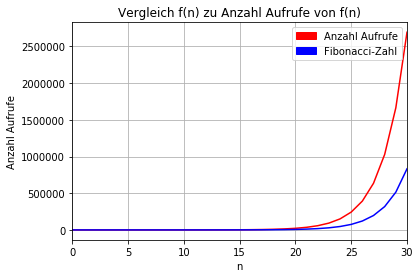

In [5]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.title('Vergleich f(n) zu Anzahl Aufrufe von f(n)')
plt.ylabel('Anzahl Aufrufe')
plt.xlabel('n')
plt.axis(xmin = 0, xmax = 30)
plt.grid(True)

plt.plot(x, y_anz_aufrufe, color = 'red')
plt.plot(x, y_fib_zahl, color = 'blue')
red_desc = mpatches.Patch(color='red', label='Anzahl Aufrufe')
blue_desc = mpatches.Patch(color='blue', label='Fibonacci-Zahl')
plt.legend(handles=[red_desc, blue_desc])

plt.show()

Beim Vergleich der Anzahl Funktionsaufrufe mit der entsprechen Fibonacci-Zahl zeigt sich an der Grafik, dass die Anzahl Funktionsaufrufe schon früh sehr stark von der jeweiligen Fibonacci-Zahl unterscheidet. Die Anzahl steigt stärker an als die Fibonacci-Zahl selbst. Anhand der Grafik erklärt sich auch, warum die rekursive Berechnung einer grossen Fibonacci-Zahl sehr rechenintensiv ist. Grund dafür sind die vielen rekursive Funktionsaufrufe, die für die Berechnung benötigt werden. Bei einer zu grossen Zahl terminiert das Programm nicht mehr in absehbarerer Zeit. Daher liegt die Annahme nahe, dass die Laufzeit exponentiell ist. Wie im Code ersichtlich ist, werden lediglich die Zahlen null und eins zurückgegeben und zusammengezählt (Ausnahmefälle). Dies bedeutet, dass am Schluss die Laufzeit des Programms sicher mindestens die Anzahl der Einsen sein wird, die zusammengezählt werden. Das ist genau der Wert der n-te Fibonacci-Zahl selbst. Das Zeitverhalten der rekursiven Funktion ist $𝑂(2^𝑛)$ somit exponentiell.

### Berechnung der n-ten Fibonacci-Zahl mit Iteration
Bei der iterativen Variante werden zwei temporäre Variablen benötigt, die die Werte von $f_{n-1}$ (`prev_1`) und  $f_{n-2}$ (`prev_2`) halten. Als Startwert der Variablen werden die Anfangswerte von $f_0$ (`prev_1`) und $f_1$ (`prev_2`) gesetzt. Bei jeder Iteration übernimmt `prev_1` den Wert von `prev_2` und `prev_2` wird neu die Summe aus `prev_1` und `prev_2`. Dieser Schritt wird $n$-mal wiederholt.

In [6]:
def fib_iterativ(n):
    """Berechnung der n-ten Fibonacci-Zahl iterativ"""
    
    prev_1, prev_2 = 0, 1
    for i in range(n):
        prev_1, prev_2 = prev_2, (prev_1 + prev_2)
    return prev_1


print(f'Die zehnte Fibonacci-Zahl: {fib_iterativ(10)}')

Die zehnte Fibonacci-Zahl: 55


Die iterative Variante hat bezüglich der O-Notation ein viel besseren Wert als die rekursive. Das Zeitverhalten der iterativen Funktion ist $O(n)$, da sich die Funktion **nicht** wie bei der rekursiven immer wieder zwei Mal pro Funktionsaufruf aufruft.

### Zeitmessung und Vergleich der iterativen und rekursiven Varianten
Im folgenden Snippet wird mithilfe der Funtkon `time()` die Dauer für die Berechnung einer Fibonacci-Zahl ausgewertet. Dazu wird jeweils der Start-Zeitpunkt und End-Zeitpunkt gemessen. Dazwischen wird jeweils die Fibonacci-Zahl berechnet. Die Differenz des End-Zeitpunkt und Start-Zeitpunkt ergibt die Dauer der Berechnung. Dies wird für die ersten 30 Fibonacci-Zahlen durchgeführt.

In [7]:
import time


print("\nZeitmessung: Berechnung der n-ten Fibonacci-Zahl mit Rekursion\n")
print (f'n\tFibonacci Zahl\tDauer (sec.)')
for n in range(31):
    start = time.time()
    zahl = fib_rekursiv(n)
    ende = time.time()
    print (f'{n}\t{zahl}\t\t{ende - start}')
    

print("\nZeitmessung: Berechnung der n-ten Fibonacci-Zahl mit Iteration\n")
print (f'n\tFibonacci Zahl\tDauer (sec.)')
for n in range(31):
    start = time.time()
    zahl = fib_iterativ(n)
    ende = time.time()
    print (f'{n}\t{zahl}\t\t{ende - start}')


Zeitmessung: Berechnung der n-ten Fibonacci-Zahl mit Rekursion

n	Fibonacci Zahl	Dauer (sec.)
0	0		2.1457672119140625e-06
1	1		9.5367431640625e-07
2	1		2.1457672119140625e-06
3	2		1.9073486328125e-06
4	3		2.6226043701171875e-06
5	5		3.814697265625e-06
6	8		7.867813110351562e-06
7	13		8.106231689453125e-06
8	21		1.3113021850585938e-05
9	34		3.2901763916015625e-05
10	55		3.695487976074219e-05
11	89		5.817413330078125e-05
12	144		8.702278137207031e-05
13	233		0.00014519691467285156
14	377		0.00023603439331054688
15	610		0.00036025047302246094
16	987		0.0005791187286376953
17	1597		0.0009851455688476562
18	2584		0.0015158653259277344
19	4181		0.002515077590942383
20	6765		0.004220724105834961
21	10946		0.0071680545806884766
22	17711		0.011200904846191406
23	28657		0.018841028213500977
24	46368		0.029417991638183594
25	75025		0.050581932067871094
26	121393		0.07021212577819824
27	196418		0.09734010696411133
28	317811		0.18091917037963867
29	514229		0.2643098831176758
30	832040		0.498981952

#### Beobachtungen  
Bei der iterativen Variante ist die benötigte Zeit für die 30te Fibonacci-Zahl auf dem Testsystem kaum messbar, da diese zu klein ist. Auch die Berechnung der 2000 Fibonacci-Zahl (0.0002071857452392578 sec) war iterativ möglich. Bei der rekursiven Variante konnte das Testsystem die Zahl jedoch nicht mehr in absehbarer Zeit rechnen, da schon die Berechnung der 30ten Fibonacci-Zahl auf dem Testsystem ca. eine halbe Sekunde benötigte.

### Effiziente rekursive Variante
Mittels einer dynamischen Programmierung kann bei der rekursiven Variante an Rechenleistung gespart werden. Die dynamische Programmierung ist eine Methode zum algorithmischen Lösen eines Optimierungsproblems durch Aufteilung in Teilprobleme und systematische Speicherung von Zwischenresultaten. Dieser Ansatz kann gut auf die rekursive Variante angewendet werden. Ein rekursiver Aufruf wird somit nur noch gestartet, wenn dieser nicht schon einmal ausgerechnet wurde. Als Startwert des Zwischenspeichers werden die Anfangswerte von $f_0$ und $f_1$ initialisiert. 

In [8]:
memory = {0:0, 1:1}
def fib_dynamisch(n):
    """Berechnung der n-ten Fibonacci-Zahl mittels einem dynamischen Programmieransatzt"""
    
    if not n in memory:
        memory[n] = fib_dynamisch(n-1) + fib_dynamisch(n-2)
    return memory[n]
    

print(f'Die zehnte Fibonacci-Zahl: {fib_dynamisch(10)}')

Die zehnte Fibonacci-Zahl: 55


Durch diese Anpassung ist die Dauer der Berechnung der 30ten Fibonacci-Zahl kaum messbar. Deshalb wurde die Zeitmessung ein weiteresmal durchgeführt. Dies jedoch für die Fibonacci-Zahlen $n=\{1'000,2'000,...10'000\}$. Da die Fibonacci-Zahlen einen enormgrossen Wert annehmen, werden diese nicht mehr ausgegeben.

In [9]:
print("\nZeitmessung: Berechnung der n-ten Fibonacci-Zahl mit dynamischer Programmierung\n")
print (f'n\tDauer (sec.)')
for n in range(1_000, 31_000, 1_000):
    start = time.time()
    zahl = fib_dynamisch(n)
    ende = time.time()
    print (f'{n}\t{ende - start}')
    

print("\nZeitmessung: Berechnung der n-ten Fibonacci-Zahl mit Iteration\n")
print (f'n\tDauer (sec.)')
for n in range(1_000, 31_000, 1_000):
    start = time.time()
    zahl = fib_iterativ(n)
    ende = time.time()
    print (f'{n}\t{ende - start}')


Zeitmessung: Berechnung der n-ten Fibonacci-Zahl mit dynamischer Programmierung

n	Dauer (sec.)
1000	0.001322031021118164
2000	0.0006680488586425781
3000	0.0007860660552978516
4000	0.0007710456848144531
5000	0.000766754150390625
6000	0.0012276172637939453
7000	0.001081228256225586
8000	0.0014698505401611328
9000	0.001226186752319336
10000	0.0013461112976074219
11000	0.002151012420654297
12000	0.0020079612731933594
13000	0.0017752647399902344
14000	0.001790761947631836
15000	0.0018639564514160156
16000	0.0018219947814941406
17000	0.0020699501037597656
18000	0.0021209716796875
19000	0.0022530555725097656
20000	0.0021619796752929688
21000	0.002315998077392578
22000	0.00304412841796875
23000	0.0025060176849365234
24000	0.002357006072998047
25000	0.0026199817657470703
26000	0.002444744110107422
27000	0.00337982177734375
28000	0.00362396240234375
29000	0.0029320716857910156
30000	0.0029578208923339844

Zeitmessung: Berechnung der n-ten Fibonacci-Zahl mit Iteration

n	Dauer (sec.)
1000	8.702

Die neue rekursive Funktion ist dank dem Zwischenspeicher schneller und somit effizienter als die iterative Variante. Jedoch muss beachtet werden, dass sich im Zwischenspeicher mit der Zeit sehr grosse und viele Datensätze befinden. Diese können Ressourcen eines Systems besetzen. Zudem würde diese Variante nur Zeit sparen, wenn mehrere Fibonacci-Zahlen ausgerechnet werden sollen.

## Fazit
Es war ein interessantes Thema die Fibonacci-Zahlen mit der Programmiersprache Python zu verknüpfen. Die Resultate waren spannend und herausfordernd. Ich konnte viel über die Programmiersprache Python lernen. Mittels diesem Thema konnte sehr einfach aufgezeigt werden wie schnell rekursive Funktionen an ihre Grenzen stossen können. Wobei diese eigentlich für ein Problem oftmals eine einfache und elegante Lösung bieten würden.